# Name : Abhishek Karmakar

# Task 1 : Prediction using Supervised ML


### Percentage of students based on no. of hours they study

In [9]:
# importing all libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
len(df)

25

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Hours,25.0,5.012,2.525094,1.1,2.14,2.7,4.8,7.4,8.42,8.82,9.128,9.2
Scores,25.0,51.480,25.286887,17.0,22.20,30.0,47.0,75.0,85.60,87.60,93.320,95.0


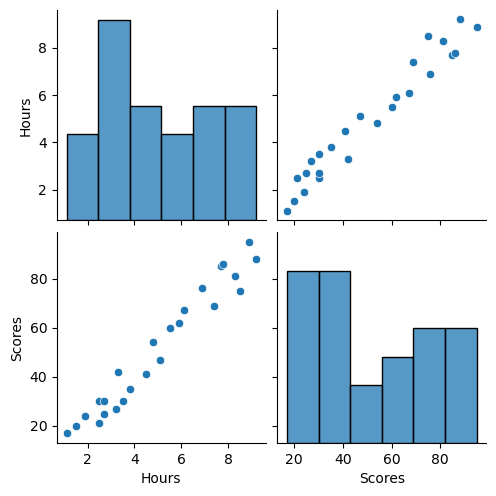

In [42]:
sns.pairplot(df)

<AxesSubplot:>

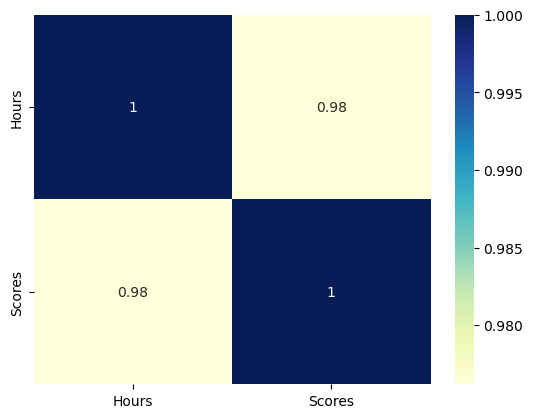

In [88]:
# HIghly Corelated Featues
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:>

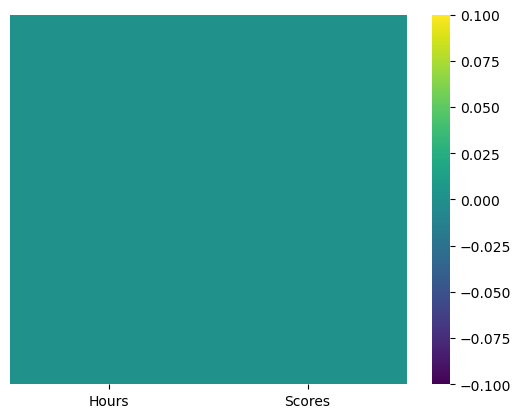

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

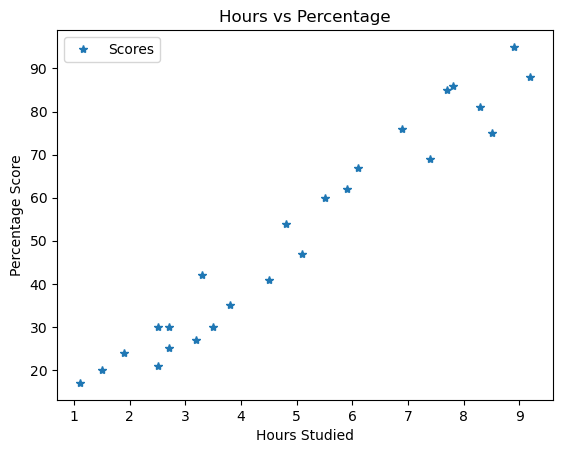

In [13]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [15]:
x = df.iloc[:, :1].values      # hours column
y = df.iloc[:, 1].values       # Score column

In [18]:
# We have split our data into training and testing sets, and now finally the time to train our algorithm.
from sklearn.model_selection import train_test_split    
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)   

In [35]:
print('No. of Training Points : ', len(x_train))
print('No. of Test Points : ', len(x_test))

No. of Training Points :  20
No. of Test Points :  5


In [19]:
# Training simple linear reression model on sample training set:
from sklearn.linear_model import LinearRegression    
regressor = LinearRegression()    
regressor.fit(x_train, y_train)   
  
print("Training ... Completed !.")  

Training ... Completed !.


In [22]:
# Regression Line
line = regressor.coef_*x+regressor.intercept_ 

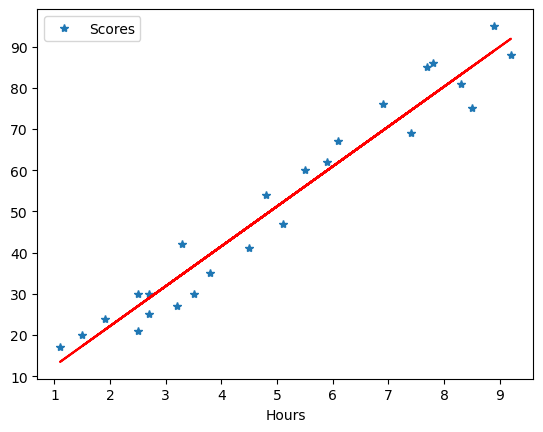

In [34]:
# Plot the regression line on the whole dataset
df.plot(x='Hours', y='Scores', style='*')
plt.plot(x, line, color="red");  
plt.show()  

In [26]:
print(x_test)   

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [27]:
#Predicting the test set result
y_pred = regressor.predict(x_test)  
print(y_pred)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


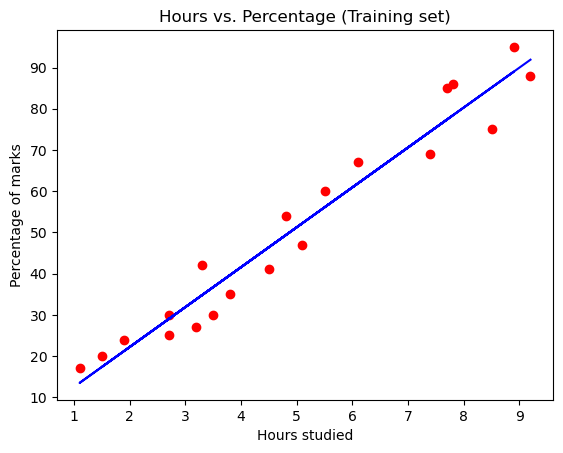

In [29]:
# Visualising the training set result
plt.scatter(x_train, y_train , color = 'red')
plt.plot(x_train, regressor.predict(x_train) , color = 'blue')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

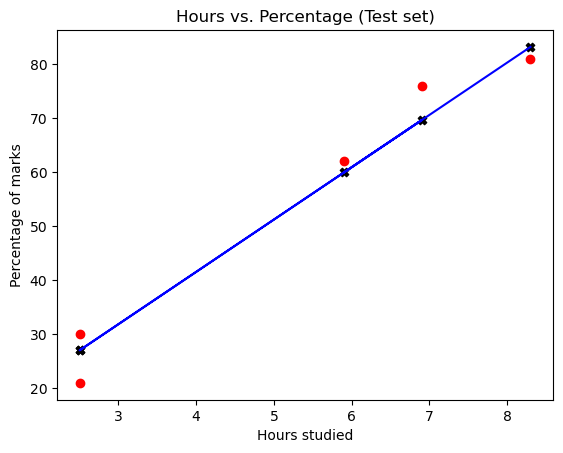

In [87]:
#Visualising the Test set results
pp = regressor.predict(x_test)
plt.scatter(x_test, y_test, color = 'red', marker='o')
plt.scatter(x_test, pp, color = 'black', marker='X')
plt.plot(x_test, pp, color = 'blue')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

In [36]:
# copparing actual value with preicted ones
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})    
df1 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [39]:
# predicting the score
hours = [[9.25]]  
own_pred = regressor.predict(hours)  
print("Number of hours = {}".format(hours))  
print("Prediction Score = {}".format(own_pred[0]))  

Number of hours = [[9.25]]
Prediction Score = 92.38611528261494


### Loss Functions

In [41]:
# Getting pretty less error
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 1.9800886824104431


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

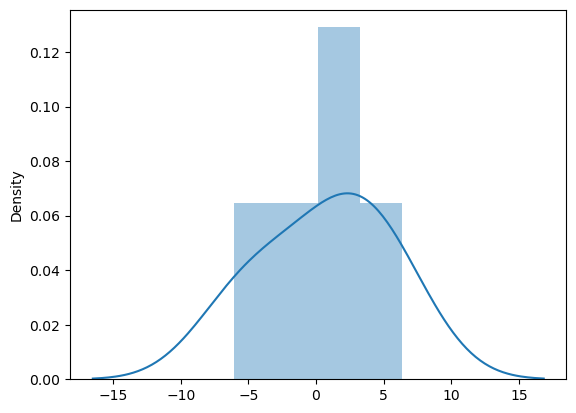

In [76]:
# Histogram of the residuals
# Normally distribution shows that its a good sign
# It shows that the model is a correct choice
sns.distplot((y_test-y_pred), bins=4)